## 1.data preprocess

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
adata = sc.read("/volume1/home/mhuang/cellTypeAbundance/data/AD/ad_raw.h5ad")

from dataset import Process
data_pipeline = Process("AD")
adata = data_pipeline.preprocess(adata)

adata_Ct34 = adata[adata.obs['batch']=='Ct3_Ct4']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['patient']!='Ct-un']
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='unID'] #unID指的是unidentify
adata_Ct34 = adata_Ct34[adata_Ct34.obs['cellType']!='doublet']

adata_AD12 = adata[adata.obs['batch']=='AD1_AD2']
adata_AD12 = adata_AD12[adata_AD12.obs['patient']!='AD-un']
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='unID'] #unID指的是unidentify
adata_AD12 = adata_AD12[adata_AD12.obs['cellType']!='doublet']

adata_Ct34.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)
adata_AD12.obs.rename(columns={'cellType': 'cell.type'}, inplace=True)

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them uniqu

In [3]:
adata_Ct34.write(f'/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_train.h5ad')
adata_AD12.write(f'/volume1/home/mhuang/cellTypeAbundance/data/AD/AD_test.h5ad')

## 2. model training

In [1]:
from propDEC_end2end import propDEC
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
# create dataset
pipeline = propDEC(metric="t-sne", mode="soft")#soft/hard/km

train_dataset = pipeline.create_dataset("AD", "AD_train.h5ad", mode="train")
test_dataset = pipeline.create_dataset("AD", "AD_test.h5ad", mode="test")

ref_adata = train_dataset.train_adata
test_adata = test_dataset.test_adata

/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints
==> Finish training !


==> Saving Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/volume1/home/mhuang/cellTypeAbundance/src/test/codes/run_M5/utils.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Got 2067 / 2187 with accuracy' 94.51%
==> resample
==> Write the resample annotated data to cache
==> Write the reweighted data to cache


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Loading Checkpoints


==> Saving Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/volume1/home/mhuang/cellTypeAbundance/src/test/codes/run_M5/utils.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Got 2019 / 2187 with accuracy' 92.32%
==> resample
==> Write the resample annotated data to cache
==> Write the reweighted data to cache
==> Loading Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Saving Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/volume1/home/mhuang/cellTypeAbundance/src/test/codes/run_M5/utils.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Got 1958 / 2187 with accuracy' 89.53%
==> resample
==> Write the resample annotated data to cache
==> Write the reweighted data to cache


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Loading Checkpoints


==> Saving Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/volume1/home/mhuang/cellTypeAbundance/src/test/codes/run_M5/utils.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Got 1916 / 2187 with accuracy' 87.61%
==> resample
==> Write the resample annotated data to cache
==> Write the reweighted data to cache


/usr/local/anaconda3/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


==> Loading Checkpoints


==> Saving Checkpoints


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/volume1/home/mhuang/cellTypeAbundance/src/test/codes/run_M5/utils.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cell_num = int(counts[index])
/usr/local/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Got 1924 / 2187 with accuracy' 87.97%
==> resample
==> Write the resample annotated data to cache
==> Write the reweighted data to cache
==> Finish!


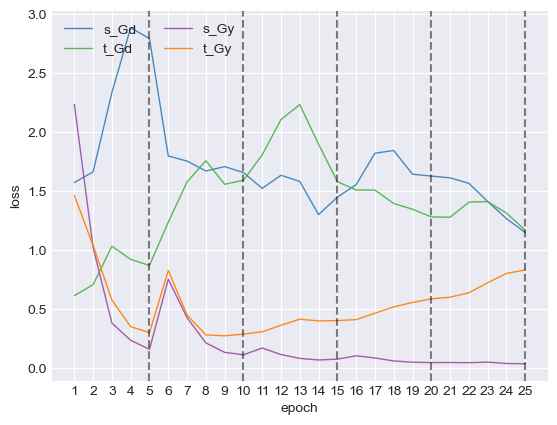

/volume1/home/mhuang/cellTypeAbundance/src/test/codes/run_M5/propDEC_end2end.py:222: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ground_truth = self.test_adata.obs.groupby('cell.type').count()/len(self.test_adata)


In [3]:
scores, proportion, f1scores, precision, recall = pipeline(epochs=5)

In [4]:
proportion

,ref,predict_1,predict_2,predict_3,predict_4,predict_5,Ground_truth
OPC,0.144558,0.0133,0.0118,0.0237,0.0152,0.0044,0.014632
astro,0.286735,0.0890,0.0615,0.0431,0.0346,0.0429,0.043439
endo,0.010884,0.0062,0.0060,0.0033,0.0019,0.0010,0.002286
mg,0.047279,0.0070,0.0067,0.0011,0.0010,0.0010,0.009145
neuron,0.041837,0.0133,0.0217,0.0386,0.0433,0.0455,0.044353
oligo,0.468707,0.8712,0.8922,0.8903,0.9040,0.9051,0.886145


In [5]:
f1scores

,predict_1,predict_2,predict_3,predict_4,predict_5
f1score_micro,0.90535,0.931870,0.903978,0.911751,0.906722
f1score_macro,0.49467,0.532497,0.389617,0.381150,0.359548


In [6]:
precision

,predict_1,predict_2,predict_3,predict_4,predict_5
OPC,0.523810,0.400000,0.127660,0.050000,0.000000
astro,0.567901,0.710744,0.560976,0.640000,0.612903
endo,0.000000,0.000000,0.000000,0.000000,0.000000
mg,0.733333,0.750000,0.000000,0.000000,0.000000
neuron,0.833333,0.888889,0.780488,0.764045,0.629213
oligo,0.940071,0.952740,0.941802,0.937094,0.933134


In [7]:
recall

,predict_1,predict_2,predict_3,predict_4,predict_5
OPC,0.343750,0.250000,0.187500,0.031250,0.000000
astro,0.968421,0.905263,0.484211,0.505263,0.600000
endo,0.000000,0.000000,0.000000,0.000000,0.000000
mg,0.550000,0.450000,0.000000,0.000000,0.000000
neuron,0.154639,0.412371,0.659794,0.701031,0.577320
oligo,0.955108,0.977812,0.960268,0.968524,0.964912
